## K-Means Clustering Lab Enhancement

<B>Introduction</B> 
In this notebook, we aim to provide deeper insights into K-Means clustering applied to a wines dataset. Instead of merely computing inertia, our approach leverages multiple indicators such as the silhouette score, Calinski-Harabasz index, and Davies-Bouldin score to robustly determine the best number of clusters. Additionally, we enrich the analysis with detailed cluster profiling and utilize dimensionality reduction (via PCA) to bring the clustering results to life visually

Objectives
This enhancement aims to fulfil these main goals:
- Multi-Metric Cluster Evaluation: Introduce additional metrics (Silhouette Score, Calinski-Harabasz Index, Davies-Bouldin Score) to complement inertia in evaluating cluster quality.
- Optimal Cluster Selection: Employ a systematic approach to determine the optimal number of clusters based on the highest Silhouette Score.
- Cluster Profiling: Perform detailed profiling of clusters to interpret their characteristics using feature means.
- Enhanced Visualizations: Use PCA for dimensionality reduction and visualization of clusters, along with bar plots for cluster sizes.

## Data Loading and Exploratory Data Analysis (EDA)

The dataset used in this exercise is wines_SPA.csv, which contains information about various wines, including their ratings, prices, body, acidity, and other features. The initial steps involve loading the dataset, exploring its structure, and visualizing key relationships among features.

## Import necessary libraries

Bring in modules for numerical operations, data manipulation, visualization, and machine learning. These libraries provide the foundation for the subsequent data analysis and clustering.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
## 1. Data Loading and EDA
df = pd.read_csv('wines_SPA.csv')

# Basic dataset overview
print("Dataset Shape:", df.shape)
print(df.head())
print(df.describe())
print(df.info())

Dataset Shape: (7500, 11)
          winery           wine  year  rating  num_reviews country  \
0  Teso La Monja          Tinto  2013     4.9           58  Espana   
1         Artadi  Vina El Pison  2018     4.9           31  Espana   
2   Vega Sicilia          Unico  2009     4.8         1793  Espana   
3   Vega Sicilia          Unico  1999     4.8         1705  Espana   
4   Vega Sicilia          Unico  1996     4.8         1309  Espana   

             region   price                  type  body  acidity  
0              Toro  995.00              Toro Red   5.0      3.0  
1    Vino de Espana  313.50           Tempranillo   4.0      2.0  
2  Ribera del Duero  324.95  Ribera Del Duero Red   5.0      3.0  
3  Ribera del Duero  692.96  Ribera Del Duero Red   5.0      3.0  
4  Ribera del Duero  778.06  Ribera Del Duero Red   5.0      3.0  
            rating   num_reviews        price         body      acidity
count  7500.000000   7500.000000  7500.000000  6331.000000  6331.000000
mean   

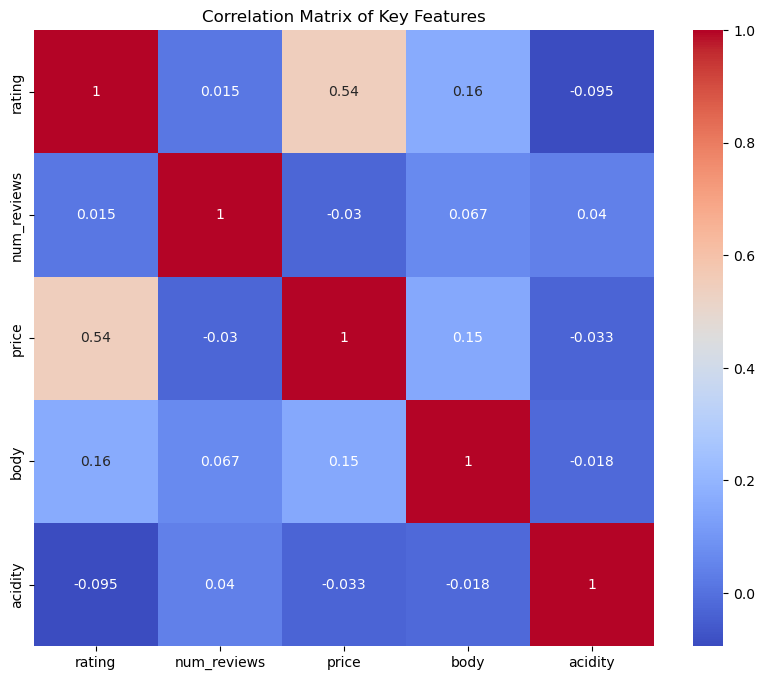

In [ ]:
#  Correlation Heatmap for key numerical features
plt.figure(figsize=(10,8))
corr = df[['rating', 'num_reviews', 'price', 'body', 'acidity']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Key Features")
plt.show()

## Data Preprocessing

Clean and prepare the dataset by handling missing values and standardizing features to ensure that all variables contribute equally to the clustering analysis.

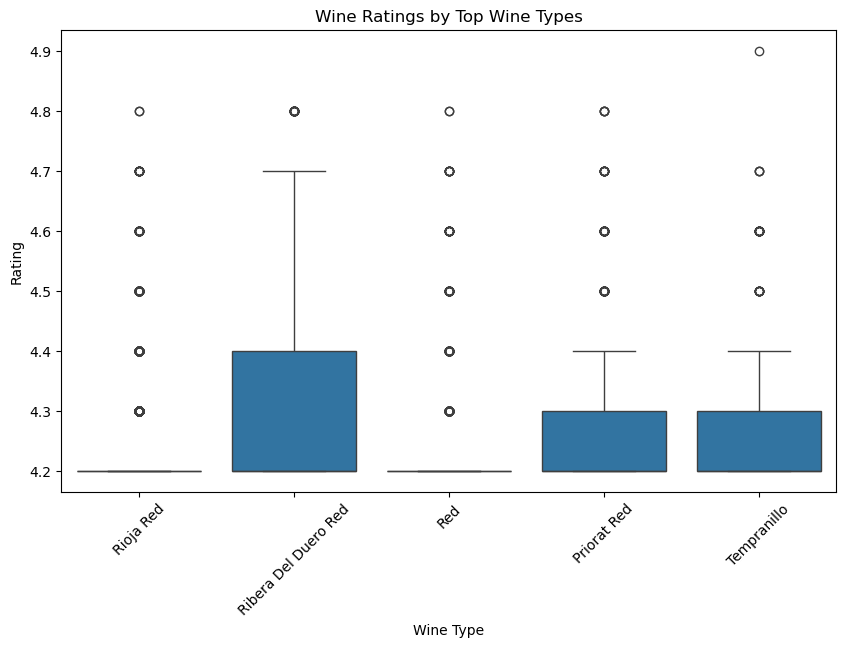

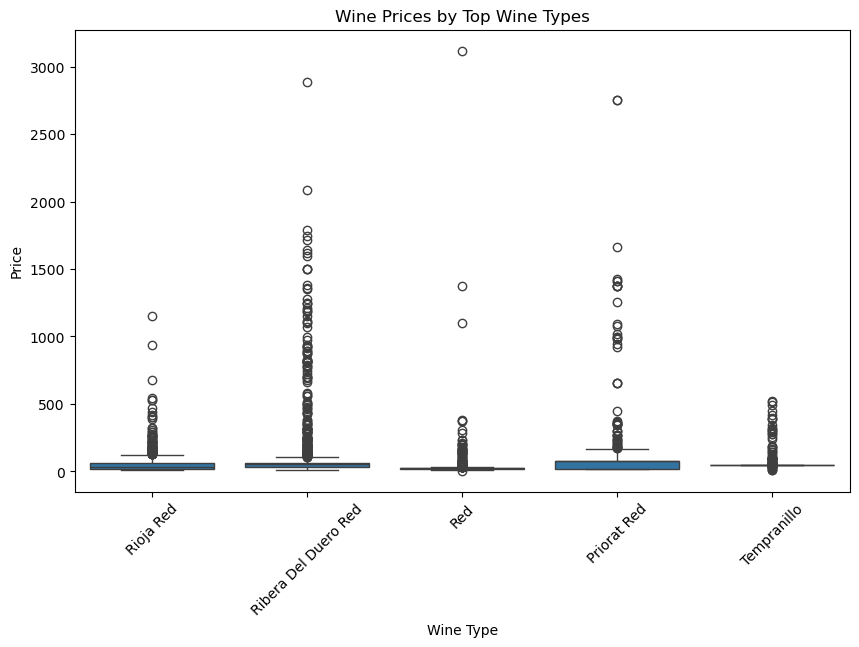

In [ ]:
# Clean the dataset and filter for top wine types
df_clean = df.dropna(subset=['type'])
top_types = df_clean['type'].value_counts().nlargest(5).index
df_top = df_clean[df_clean['type'].isin(top_types)]

# Boxplot for Wine Ratings by Top Wine Types
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='rating', data=df_top, order=top_types)
plt.xticks(rotation=45)
plt.title("Wine Ratings by Top Wine Types")
plt.xlabel("Wine Type")
plt.ylabel("Rating")
plt.show()

# Boxplot for Wine Prices by Top Wine Types
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='price', data=df_top, order=top_types)
plt.xticks(rotation=45)
plt.title("Wine Prices by Top Wine Types")
plt.xlabel("Wine Type")
plt.ylabel("Price")
plt.show()


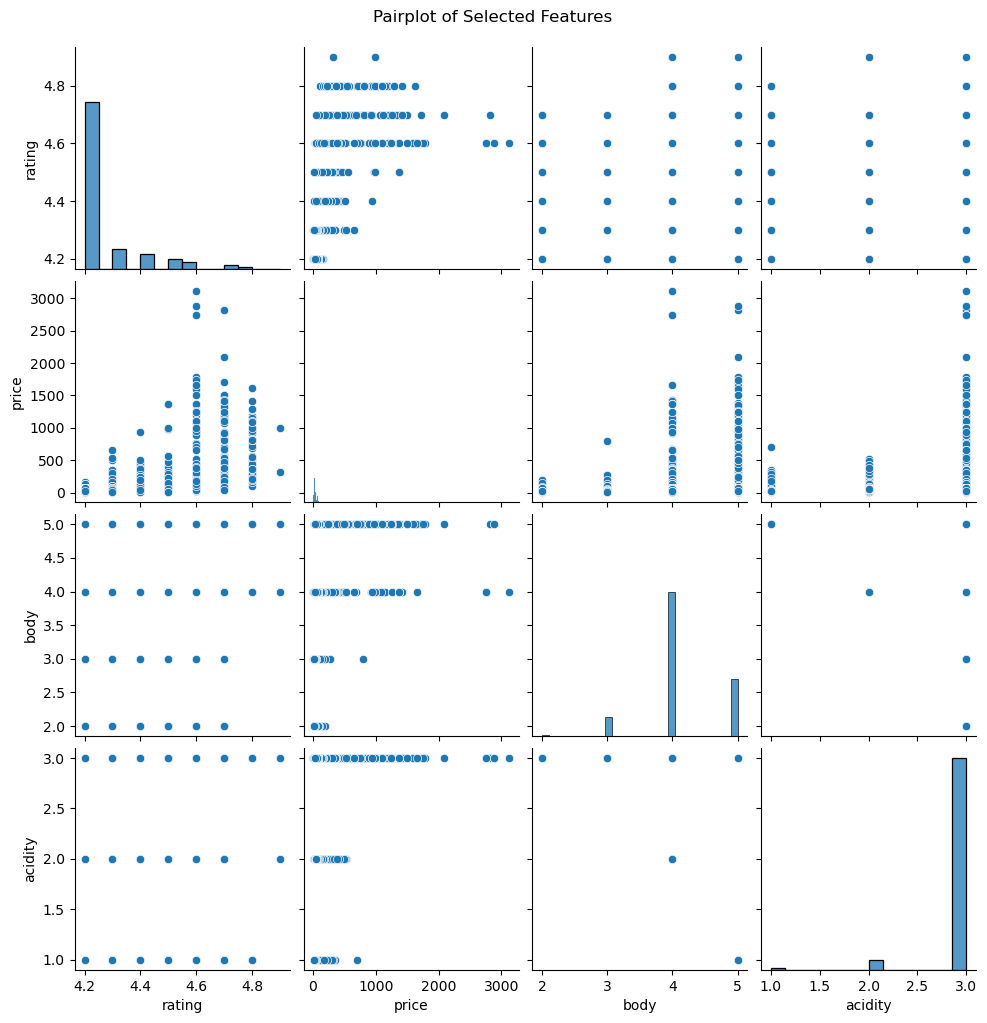

In [ ]:
# Pairplot for selected features 
selected_features = ['rating', 'price', 'body', 'acidity']
df_sample = df_clean[selected_features].dropna()
sns.pairplot(df_sample)
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

In [ ]:
# Prepare the data for clustering: select, clean, and standardize features
features = selected_features
df = df.dropna(subset=features)   # Ensure complete records for chosen features
X = df[features].copy()           # Select features for clustering

scaler = StandardScaler()         # Instantiate StandardScaler
X_scaled = scaler.fit_transform(X)  # Standardize the features into a common scale

## Determining the Optimal Number of Clusters

Implement a robust method to select the optimal number of clusters by evaluating multiple metrics such as inertia, Silhouette Score, Calinski-Harabasz, and Davies-Bouldin scores.

In [ ]:
## 2. Determine Optimal Number of Clusters using Multiple Metrics
k_range = range(2, 11)  
results = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertia = kmeans.inertia_
    sil_score = silhouette_score(X_scaled, labels)
    ch_index = calinski_harabasz_score(X_scaled, labels)
    db_score = davies_bouldin_score(X_scaled, labels)
    results.append({
        'k': k,
        'inertia': inertia,
        'silhouette': sil_score,
        'calinski_harabasz': ch_index,
        'davies_bouldin': db_score
    })
    print(f"k = {k}: Inertia = {inertia:.2f}, Silhouette = {sil_score:.2f}, CH = {ch_index:.2f}, DB = {db_score:.2f}")


optimal_entry = max(results, key=lambda x: x['silhouette'])
optimal_k = optimal_entry['k']
print(f"\nOptimal number of clusters (k) based on silhouette score: {optimal_k}")

k = 2: Inertia = 24951.08, Silhouette = 0.60, CH = 1700.50, DB = 1.27
k = 3: Inertia = 19709.24, Silhouette = 0.66, CH = 1917.70, DB = 0.61
k = 4: Inertia = 15267.89, Silhouette = 0.57, CH = 2263.60, DB = 0.81
k = 5: Inertia = 11819.09, Silhouette = 0.57, CH = 2654.22, DB = 0.71
k = 6: Inertia = 8953.54, Silhouette = 0.63, CH = 3207.38, DB = 0.69
k = 7: Inertia = 7356.13, Silhouette = 0.70, CH = 3481.58, DB = 0.65
k = 8: Inertia = 6041.73, Silhouette = 0.71, CH = 3829.38, DB = 0.62
k = 9: Inertia = 5344.02, Silhouette = 0.71, CH = 3890.96, DB = 0.60
k = 10: Inertia = 4716.22, Silhouette = 0.73, CH = 4011.69, DB = 0.65

Optimal number of clusters (k) based on silhouette score: 10


## Clustering and Cluster Profiling

Fit the K-Means model using the optimal number of clusters and perform cluster profiling to interpret the key characteristics of each cluster.

In [ ]:
## 3. Fit K-Means with Optimal k and Profile Clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)
clusters = kmeans_optimal.fit_predict(X_scaled)
df['cluster'] = clusters


cluster_profile = df.groupby('cluster')[features].mean()
print("\nCluster Profiling (Mean values per cluster):")
print(cluster_profile)


Cluster Profiling (Mean values per cluster):
           rating   num_reviews        price      body  acidity
cluster                                                        
0        4.519741    461.983819   125.625228  5.000000      3.0
1        4.209854    408.579277    34.576421  4.000000      3.0
2        4.494286    182.828571   148.874286  5.000000      1.0
3        4.683333    217.718750  1189.623229  4.697917      3.0
4        4.383333   5550.733333    84.552802  4.583333      3.0
5        4.211234    418.175319    43.625852  5.000000      3.0
6        4.200000  32624.000000     4.990000  4.000000      3.0
7        4.267164    339.652985    75.329418  4.000000      2.0
8        4.474684    244.651899   109.696908  3.951477      3.0
9        4.228191    371.312057    23.878755  2.945035      3.0


## Visualization of Clustering Results

Provide intuitive visual representations of the clustering outcomes by using PCA for dimensionality reduction and bar plots for cluster size distribution.

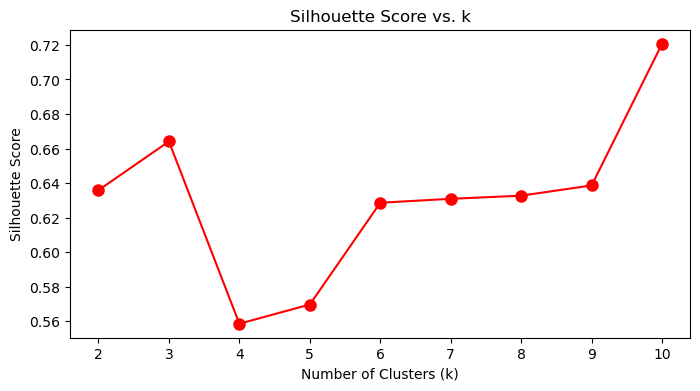

In [ ]:
# Plot Silhouette Scores vs. k
plt.figure(figsize=(8,4))
plt.plot(K, silhouette_scores, 'ro-', markersize=8)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. k")
plt.show()

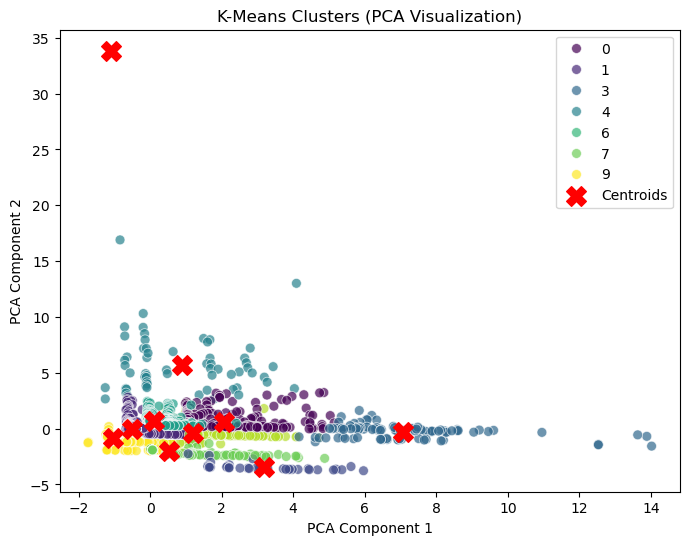

In [ ]:

# PCA Visualization with Cluster Centroids
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroids = kmeans_optimal.cluster_centers_
centroids_pca = pca.transform(centroids)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='viridis', s=50, alpha=0.7)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means Clusters (PCA Visualization)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


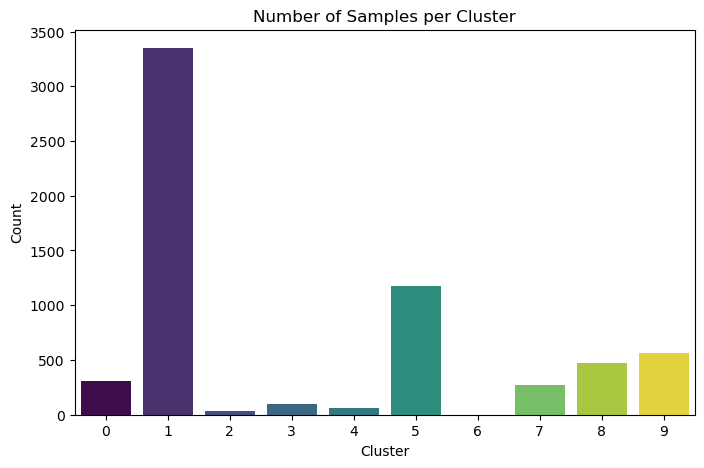

In [ ]:
plt.figure(figsize=(8,5))
bar_plot = sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values, hue=cluster_sizes.index, palette='viridis', dodge=False)
bar_plot.get_legend().remove()  
plt.title("Number of Samples per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

Reference :
- https://www.kaggle.com/code/fedesoriano/spanish-wine-quality-dataset-introduction/input
- https://scikit-learn.org/stable/modules/clustering.html#evaluating-clustering-performance
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html